# Obligatorio - Taller de Deep Learning

**Fecha de entrega:** 3/12/2025  
**Puntaje máximo:** 50 puntos

**Alumno(s):** Natialia Campiglia - Maria Jose Carbajal

## Obligatorio

El objetivo de este obligatorio es evaluar su conocimiento en Deep Learning mediante la implementación completa de un modelo de segmentación de imágenes basado en el paper [**"U-Net: Convolutional Networks for Biomedical Image Segmentation"**](https://arxiv.org/pdf/1505.04597). Toda la implementación debe realizarse desde cero utilizando PyTorch, y los estudiantes tendrán la libertad de ajustar ciertos hiperparámetros y configuraciones mientras mantengan la esencia del paper original.

### **Competencia en Kaggle**

Además, como parte de este obligatorio, participarán en una competencia privada en Kaggle donde se les proporcionará un dataset de test oculto (sin target). Deberán subir sus predicciones a Kaggle y se evaluarán en función de la métrica **Dice Coefficient (Coeficiente de Dice)**. Esta competencia les permitirá comparar sus resultados con los de sus compañeros en un entorno real de evaluación.

### **¿Qué es el Dice Coefficient?**
El **Dice Coefficient**, también conocido como F1-score para segmentación, es una métrica utilizada para evaluar la similitud entre la predicción y la verdad del terreno en tareas de segmentación. Se define de la siguiente manera:

$$
\text{Dice} = \frac{2 \cdot |A \cap B|}{|A| + |B|}
$$

Donde:
- $A$ es el conjunto de píxeles predichos como pertenecientes a la clase positiva.
- $B$ es el conjunto de píxeles verdaderos pertenecientes a la clase positiva.
- $|A \cap B|$ es la intersección de $A$ y $B$, es decir, los píxeles correctamente predichos como positivos.

Un valor de Dice de **1** indica una predicción perfecta, mientras que un valor de **0** indica que no hay coincidencia entre la predicción y el valor verdadero. Durante la competencia de Kaggle, deberán obtener un puntaje de al menos **0.75** en la métrica Dice para considerarse aprobados.

### **Criterios a Evaluar**

1. **Análisis del Dataset (5 puntos):**
   - Exploración y visualización del dataset para comprender su estructura y características.
   - Justificación de las decisiones tomadas en la preprocesamiento de datos, como normalización, aumento de datos (data augmentation), y partición del dataset en conjuntos de entrenamiento, validación y prueba.

2. **Implementación Correcta del Modelo U-Net (20 puntos):**
   - Construcción de la arquitectura U-Net siguiendo la estructura descrita en el paper, permitiendo ajustes como el número de filtros, funciones de activación y métodos de inicialización de pesos.
   - Se aceptan mejoras como el uso de técnicas adicionales como batch normalization, otras funciones de activación, etc.

3. **Entrenamiento del Modelo (10 puntos):**
   - Configuración adecuada del ciclo de entrenamiento, incluyendo la elección de la función de pérdida y del optimizador (Adam, SGD, etc.).
   - Uso de técnicas de regularización para mejorar la generalización del modelo, como el dropout, normalización de batch y data augmentation.
   - Gráficas y análisis de la evolución del entrenamiento, mostrando las curvas de pérdida y métricas relevantes tanto en el conjunto de entrenamiento como en el de validación.
   - Puede utilizarse experimentación con hiperparámetros con Weights & Biases (W&B) para optimizar el rendimiento del modelo. Este punto no es obligatorio, pero se valorará positivamente si se justifica su uso y se presentan resultados claros.

4. **Evaluación de Resultados (10 puntos):**
   - Evaluación exhaustiva del modelo utilizando métricas de segmentación como **Dice Coefficient**.
   - Análisis detallado de los resultados, incluyendo un análisis de errores para identificar y discutir casos difíciles.
   - Visualización de ejemplos representativos de segmentaciones correctas e incorrectas, comparando con las etiquetas manuales proporcionadas en el dataset.

5. **Participación y Resultados en la Competencia Kaggle (5 puntos):**
   - Participación activa en la competencia de Kaggle, con al menos una (1) subida de predicción.
   - Puntaje obtenido en la tabla de posiciones de Kaggle, evaluado en base al **Dice Coefficient** en el conjunto de test oculto. Es necesario obtener al menos un valor de **0.75** para esta métrica.

   Notas: 
   - **Cualquier decisión debe ser justificada en el notebook.**
   - El **Dice Coefficient** es la métrica utilizada para evaluar la precisión de los modelos de segmentación de imágenes en esta competencia.

### **Run-Length Encoding (RLE)**

Dado que no se suben las imágenes segmentadas directamente a Kaggle, se requiere usar **Run-Length Encoding (RLE)** para comprimir las máscaras de predicción en una cadena de texto que será evaluada. El **RLE** es una técnica de compresión donde se representan secuencias consecutivas de píxeles en formato `start length`, indicando la posición de inicio y la longitud de cada secuencia de píxeles positivos.

Para calcular el **RLE**, se sigue el siguiente proceso:

1. Se aplanan las máscaras predichas en un solo vector
2. Se identifican los píxeles con valor positivo (1) y se calculan las secuencias consecutivas.
3. Se registra la posición de inicio de cada secuencia y su longitud en formato `start length`.

Este formato comprimido se sube a Kaggle en lugar de las imágenes segmentadas.

#### **Ejemplo de RLE**

```python
import numpy as np

def rle_encode(mask):
    pixels = np.array(mask).flatten(order='F')  # Aplanar la máscara en orden Fortran
    pixels = np.concatenate([[0], pixels, [0]])  # Añadir ceros al principio y final
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1  # Encontrar transiciones
    runs[1::2] = runs[1::2] - runs[::2]  # Calcular longitudes
    return ' '.join(str(x) for x in runs)

mask = np.array([[0, 0, 1, 0, 0],
                 [0, 1, 1, 1, 0],
                 [1, 1, 1, 0, 0],
                 [0, 0, 0, 1, 1]])

print(rle_encode(mask))
```

> **Salida:** 3 1 6 2 9 3 14 1 16 1 20 1


### **Sobre el Dataset**

El dataset proporcionado para esta tarea incluirá imágenes y máscaras para la segmentación de un conjunto específico de clases. El conjunto de entrenamiento estará disponible para su uso durante todo el proceso de desarrollo y pruebas, mientras que el conjunto de validación se mantendrá oculto para la evaluación final en Kaggle.

### **Instrucciones de Entrega**

- Deberán entregar un Jupyter Notebook (.ipynb) que contenga todo el código y las explicaciones necesarias para ejecutar la implementación, el entrenamiento y la evaluación del modelo.
- El notebook debe incluir secciones bien documentadas explicando las decisiones de diseño del modelo, los experimentos realizados, y los resultados obtenidos.
- El código debe estar escrito de manera clara.
- La entrega debe realizarse a través de la plataforma de gestión de ORT (gestion.ort.edu.uy) antes de la fecha límite.

### **Materiales Adicionales**

Para facilitar su trabajo, pueden consultar los siguientes recursos:

- [U-Net: Convolutional Networks for Biomedical Image Segmentation (paper original)](https://arxiv.org/abs/1505.04597)
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Tutoriales y recursos adicionales en Kaggle](https://www.kaggle.com/)
- [Convolución Transpuesta](https://d2l.ai/chapter_computer-vision/transposed-conv.html)

### **Competencia Kaggle**

[Link a la competencia Kaggle](https://www.kaggle.com/competitions/tdl-obligatorio-2025)

---

# Integrantes del grupo

Natalia Campiglia - 349251

Maria Jose Carbajal - 241319

# Imports

In [2]:
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [kaggle]2m2/3 [kaggle]


In [41]:
import os, json, random
import hashlib

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from pathlib import Path

# Dataset

In [15]:
with open("config/kaggle.json") as f:
    creds = json.load(f)

os.environ["KAGGLE_USERNAME"] = creds["username"]
os.environ["KAGGLE_KEY"] = creds["key"]

In [44]:
!kaggle competitions download -c tdl-obligatorio-2025 --force

 99%|█████████████████████████████████████▊| 2.13G/2.14G [00:01<00:00, 1.59GB/s]
100%|███████████████████████████████████████| 2.14G/2.14G [00:02<00:00, 969MB/s]


In [45]:
!unzip -o -qq tdl-obligatorio-2025.zip -d data/

# Exploración de datos

## Ver selección random de imágenes y sus máscaras

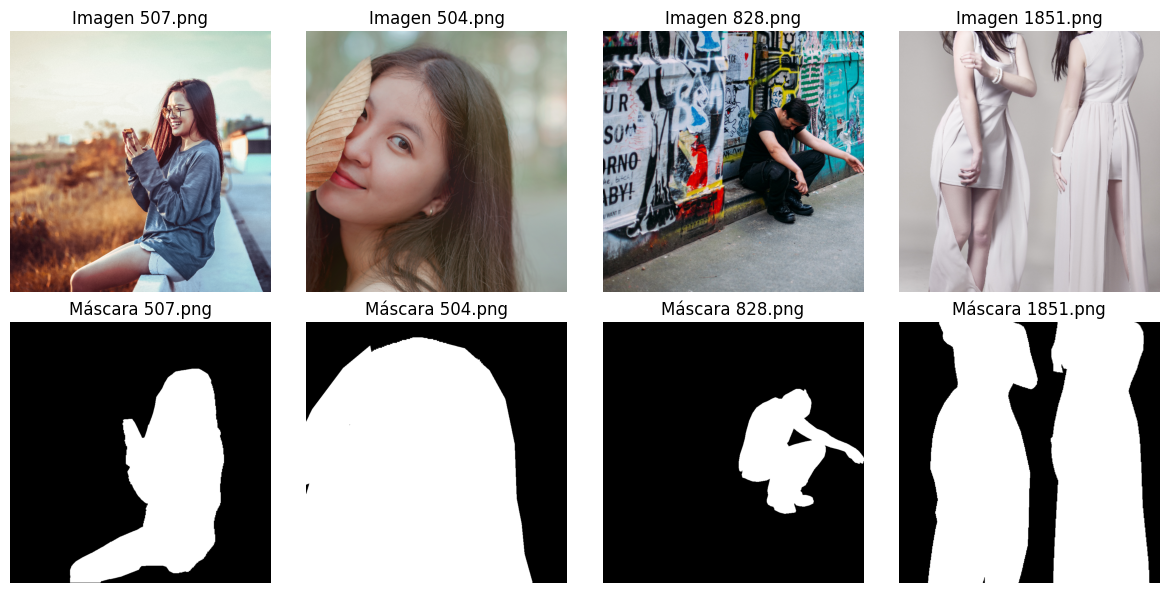

In [52]:
import os, random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img_folder = "data/train/images"
mask_folder = "data/train/masks"

# seleccionar 4 imágenes
files = random.sample(os.listdir(img_folder), 4)

plt.figure(figsize=(12,6))
for i, f in enumerate(files):
    # imagen
    img = Image.open(os.path.join(img_folder, f))
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Imagen {f}")

    # máscara correspondiente
    mask_path = os.path.join(mask_folder, f)
    mask = np.array(Image.open(mask_path))
    if mask.ndim == 3:
        mask = mask.max(axis=2)  # colapsar canales RGB→1 canal --> si no hacemos esto, al mostrar la mascara se ve solo negro
    plt.subplot(2, 4, i + 1 + 4)
    plt.imshow(mask, cmap="gray", vmin=0, vmax=1)
    plt.axis("off")
    plt.title(f"Máscara {f}")

plt.tight_layout()
plt.show()


Las imágenes son todas de buena calidad, se ven nítidas, centradas...

## Ver tamaños de imágenes y máscaras

In [40]:
folder = "data/train/images"
sizes = set() 
for fname in os.listdir(folder):
    path = os.path.join(folder, fname)
    with Image.open(path) as img:
        sizes.add(img.size)

print("Tamaño de imagenes:")
for size in sizes:
    print(size)

folder = "data/train/masks"
sizes = set() 
for fname in os.listdir(folder):
    path = os.path.join(folder, fname)
    with Image.open(path) as img:
        sizes.add(img.size)

print("Tamaño de máscaras:")
for size in sizes:
    print(size)

Tamaño de imagenes:
(800, 800)
Tamaño de máscaras:
(800, 800)


Confirmamos que todas las imágenes y las máscaras tienen el mismo tamaño.

## Buscar duplicados

In [36]:
def md5_file(path: Path):
    with path.open("rb") as f:
        return hashlib.md5(f.read()).hexdigest()

hashes = {}
duplicates = []

folder = Path("data/train/images")

for path in folder.iterdir():
    if path.is_file():
        h = md5_file(path)
        if h in hashes:
            duplicates.append((str(path), str(hashes[h])))
        else:
            hashes[h] = path

print(f"Encontradas {len(duplicates)} imágenes duplicadas.")

Encontradas 0 imágenes duplicadas.


## Formato y canales

In [56]:
img_dir = Path("data/train/images")
mask_dir = Path("data/train/masks")

img_channel_counts = set()
mask_channel_counts = set()
mask_unique_values = set()

for img_path, mask_path in zip(sorted(img_dir.iterdir()), sorted(mask_dir.iterdir())):
    if img_path.suffix.lower() not in [".jpg", ".png", ".jpeg"]:
        continue

    # Imagen
    # escala de grises: (hight, width) -> 1 canal
    # RGB: (hight, width, channels) = (height, width, 3) -> 3 canales
    # RGBA: (hight, width, 4)
    try:
        img = np.array(Image.open(img_path))
        img_channels = 1 if img.ndim == 2 else img.shape[2]
        img_channel_counts.add(img_channels)
    
        # Máscara
        mask = np.array(Image.open(mask_path))
        mask_channels = 1 if mask.ndim == 2 else mask.shape[2]
        mask_channel_counts.add(mask_channels)
    
        # Valores únicos de cada máscara (agrega como tupla)
        mask_unique_values.add(tuple(np.unique(mask)))
    except:
        pass

print(f"Canales únicos en imágenes: {img_channel_counts}")
print(f"Canales únicos en máscaras: {mask_channel_counts}")
print(f"Conjuntos de valores únicos en máscaras: {mask_unique_values}")

Canales únicos en imágenes: {1, 3, 4}
Canales únicos en máscaras: {3}
Conjuntos de valores únicos en máscaras: {(0, 1), (1,)}


Tenemos imágenes en formato blanco y negro, RGB y RGBA.

Las máscaras son todas RGB.

## Histograma de colores en las imágenes

Detectar problemas de normalización o contraste

Si todo está concentrado en valores bajos (0–50), las imágenes están oscuras.

Si todo está en 200–255, están sobreexpuestas.

Analizar balance de color

Si un canal domina (ej. rojo más alto), hay un sesgo cromático global.

Decidir transformaciones previas

Si las intensidades son dispares entre canales o datasets, necesitás normalizar.

Te ayuda a calcular mean y std por canal para usar en T.Normalize(mean, std) en PyTorch.

Verificar consistencia entre dominios

Si tenés train y val, podés comparar histogramas y ver si tienen distribuciones similares (importante para evitar domain shift).

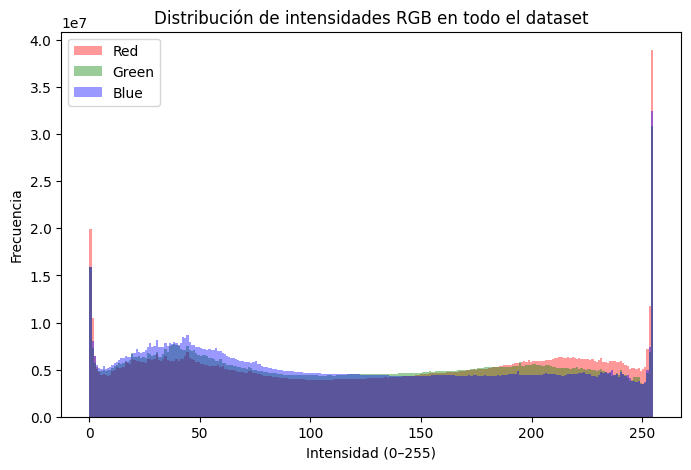

In [57]:
folder = Path("data/train/images")

# Acumuladores de cada canal
r_vals, g_vals, b_vals = [], [], []

for p in folder.iterdir():
    if p.suffix.lower() not in [".jpg", ".jpeg", ".png"]:
        continue
    img = np.array(Image.open(p).convert("RGB"))
    # achatar para juntar todos los píxeles
    r, g, b = img[..., 0].ravel(), img[..., 1].ravel(), img[..., 2].ravel()
    r_vals.append(r)
    g_vals.append(g)
    b_vals.append(b)

# concatenar todos los valores
r_vals = np.concatenate(r_vals)
g_vals = np.concatenate(g_vals)
b_vals = np.concatenate(b_vals)

# histograma combinado
plt.figure(figsize=(8,5))
plt.hist(r_vals, bins=256, color='r', alpha=0.4, label='Red')
plt.hist(g_vals, bins=256, color='g', alpha=0.4, label='Green')
plt.hist(b_vals, bins=256, color='b', alpha=0.4, label='Blue')
plt.legend()
plt.title("Distribución de intensidades RGB en todo el dataset")
plt.xlabel("Intensidad (0–255)")
plt.ylabel("Frecuencia")
plt.show()


Buen balance de color.

## Analizar qué porcentaje de la imagen es ocupado por la persona

Distribución de coberturas:
Te muestra si los objetos ocupan casi todo el frame o son pequeños.

picos cerca de 0 → objetos chicos (personas a distancia)

picos altos → objetos grandes o zoom cercano

Correlación área–cobertura:
En teoría debería ser ≈ 1 (porque son variables proporcionales), pero te sirve para confirmar consistencia.

Correlación relación_aspecto–cobertura:
Si es alta, puede indicar que las personas tienden a aparecer con ciertas proporciones (ej. más verticales).

Ayuda a diseñar augmentations: si hay muchos objetos pequeños, conviene incluir crops y escalados.

Controla el sesgo del dataset: si casi todas las máscaras cubren el 80% del frame, el modelo puede aprender a predecir “persona en toda la imagen”.

Permite ajustar el tamaño de entrada (crop size) para capturar correctamente el rango típico de coberturas.

En síntesis: este análisis te dice cuánto espacio ocupan las personas en tus imágenes y si el dataset está equilibrado entre sujetos grandes, medianos o pequeños.

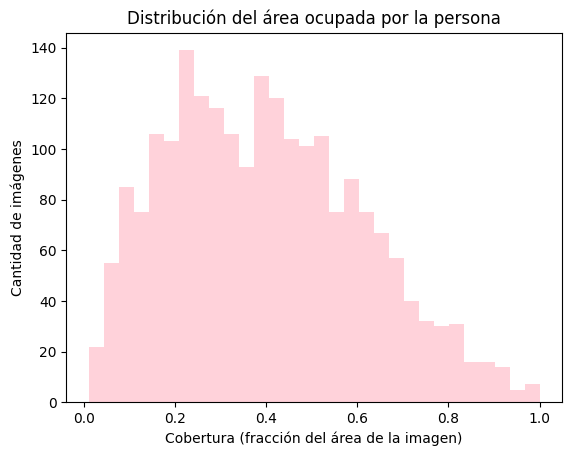

Cobertura promedio: 0.399
Rango: 0.010 – 1.000


In [62]:
mask_dir = Path("data/train/masks")

coverages = []

for p in mask_dir.glob("*.png"):
    mask = np.array(Image.open(p))[:, :, 0]   # un canal, valores {0,1}
    h, w = mask.shape
    coverage = mask.sum() / (h * w)
    coverages.append(coverage)

coverages = np.array(coverages)

plt.hist(coverages, bins=30, color='pink', alpha=0.7)
plt.xlabel("Cobertura (fracción del área de la imagen)")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución del área ocupada por la persona")
plt.show()

print(f"Cobertura promedio: {coverages.mean():.3f}")
print(f"Rango: {coverages.min():.3f} – {coverages.max():.3f}")


## Conclusión de la exploración de datos